<a href="https://colab.research.google.com/github/SHIBI-UMESH/twiiter-analysis/blob/main/TWITTER_ANALYSIS_tatlorswift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install textblob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:

def cleanTxt(text):

 text=re.sub(r'@[A-Za-z0-9||_]+', ' ',text)
 text=re.sub(r'#[A-Za-z0-9]+',' ',text)
 text=re.sub(r'RT[\S]+',' ',text)
 text=re.sub(r'https?:\/\/\S+',' ',text)
 text=re.sub(r'\W+',' ',text)
 
 

 return text

In [ ]:

query = "(from:	@taylorswift13) until:2022-11-09 since:2008-01-01"
tweets = []
limit = 1000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content])
        
df1 = pd.DataFrame(tweets,columns=['@taylorswift13'])
print(df1)

                                        @taylorswift13
0    @Chilis @taylorswift13 chilis doesn’t slap any...
1      @PopBase @taylorswift13 this is from yerterday?
2    @taylorswift13 @bleachersmusic @jackantonoff D...
3    @Kimbrrlee_ @taylorswift13 @taylornation13 We'...
4    @umichvoter We’re partying it up and taking so...
..                                                 ...
995  .@taylorswift13's "Midnights" received 445,570...
996  not me anticipating to travel from canada to s...
997  .@taylorswift13's "Midnights" received 180,069...
998  @forcemm @taylorswift13 @tacobell I went to a ...
999  @mclegend19_ @Nightingale2204 @chartdata @tayl...

[1000 rows x 1 columns]


In [ ]:
df1

,@taylorswift13
0,@Chilis @taylorswift13 chilis doesn’t slap any...
1,@PopBase @taylorswift13 this is from yerterday?
2,@taylorswift13 @bleachersmusic @jackantonoff D...
3,@Kimbrrlee_ @taylorswift13 @taylornation13 We'...
4,@umichvoter We’re partying it up and taking so...
...,...
995,".@taylorswift13's ""Midnights"" received 445,570..."
996,not me anticipating to travel from canada to s...
997,".@taylorswift13's ""Midnights"" received 180,069..."
998,@forcemm @taylorswift13 @tacobell I went to a ...


In [ ]:

#CLEANING ELON MUSK TWEETS USING THE SNSCRAPE MNODULE
query = "(from:@taylorswift13) until:2020-01-01 since:2010-01-01"
tweets = []

limit = 1000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweet = str(tweet.content)
        tweet = cleanTxt(tweet)
        tweets.append(tweet)
        
#df = pd.DataFrame(tweets)
df = pd.DataFrame(tweets,columns=['@taylorswift13'])
print(df)

                                        @taylorswift13
0    Absolutely loved reliving the making of Lover ...
1     The Making of 24 hours and a lot of xmas spirit 
2    Walked into the studio to a surprise birthday ...
3                                   Claws out kitties 
4    How To Be A Cat Go see in theaters December 20...
..                                                 ...
326   is texting me about how she tried to take a b...
327   has just pointed out the coincidence involved...
328             Get well soon and I love and miss you 
329                                 THAT is BEAUTIFUL 
330   hahaha i know you are but what am I Way to br...

[331 rows x 1 columns]


In [ ]:
df

,@taylorswift13
0,Absolutely loved reliving the making of Lover ...
1,The Making of 24 hours and a lot of xmas spirit
2,Walked into the studio to a surprise birthday ...
3,Claws out kitties
4,How To Be A Cat Go see in theaters December 20...
...,...
326,is texting me about how she tried to take a b...
327,has just pointed out the coincidence involved...
328,Get well soon and I love and miss you
329,THAT is BEAUTIFUL


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity']=df['@taylorswift13'].apply(getSubjectivity)
df['Polarity'] = df['@taylorswift13'].apply(getPolarity)

In [ ]:
df

,@taylorswift13,Subjectivity,Polarity
0,Absolutely loved reliving the making of Lover ...,0.800000,0.700000
1,The Making of 24 hours and a lot of xmas spirit,0.000000,0.000000
2,Walked into the studio to a surprise birthday ...,0.405556,-0.033333
3,Claws out kitties,0.000000,0.000000
4,How To Be A Cat Go see in theaters December 20...,0.000000,0.000000
...,...,...,...
326,is texting me about how she tried to take a b...,0.000000,0.000000
327,has just pointed out the coincidence involved...,1.000000,0.600000
328,Get well soon and I love and miss you,0.600000,0.500000
329,THAT is BEAUTIFUL,1.000000,0.850000


<function matplotlib.pyplot.show(*args, **kw)>

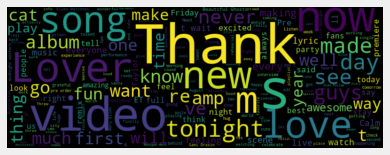

In [ ]:
#plotting word cloud
allWords=' '.join( [twts for twts in df['@taylorswift13'] ] )
wordCloud= WordCloud(width= 800, height=300, random_state=21, max_font_size=119).generate(allWords) 

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [ ]:
#create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score< 0:
    return 'Negative'
  elif score==0:
     return 'Neutral'
  else:
     return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,@taylorswift13,Subjectivity,Polarity,Analysis
0,Absolutely loved reliving the making of Lover ...,0.800000,0.700000,Positive
1,The Making of 24 hours and a lot of xmas spirit,0.000000,0.000000,Neutral
2,Walked into the studio to a surprise birthday ...,0.405556,-0.033333,Negative
3,Claws out kitties,0.000000,0.000000,Neutral
4,How To Be A Cat Go see in theaters December 20...,0.000000,0.000000,Neutral
...,...,...,...,...
326,is texting me about how she tried to take a b...,0.000000,0.000000,Neutral
327,has just pointed out the coincidence involved...,1.000000,0.600000,Positive
328,Get well soon and I love and miss you,0.600000,0.500000,Positive
329,THAT is BEAUTIFUL,1.000000,0.850000,Positive


In [ ]:
#PRINT ALL OF THE POSITIVE TWEETS

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Positive' ):
    print(str(j) + ') '+sortedDF['@taylorswift13'][i])
    print()
    j = j+1

1) Absolutely loved reliving the making of Lover Diary of a Song with 

2) Honestly spending my 30th with the fans who have made my life what it is at jingle ball then throwing the most aggressive holiday party known to womankind I just seriously feel so lucky and will spend forever trying to find ways to say thank you cries in Christmas tree 

3) Happy birthday but make it santa 

4) Fur real guys this was my cake 

5) When you re pretttttty sure that if you were a man you d be the man Sami Drasin 

6) HEY THANKS it was a whole entire party chatting with and Sami Drasin killed it with these photos Thank you so much for this honor 

7) Throwback to my first day on the set of Basically Bombalurina is one of those really mischievous cats you see in internet videos who has figured out how to open human doors 

8) I ended up spending many days on set watching the other performers do their scenes Watching the character Victoria played by Frankie Hayward inspired me so much and Beautiful Gho

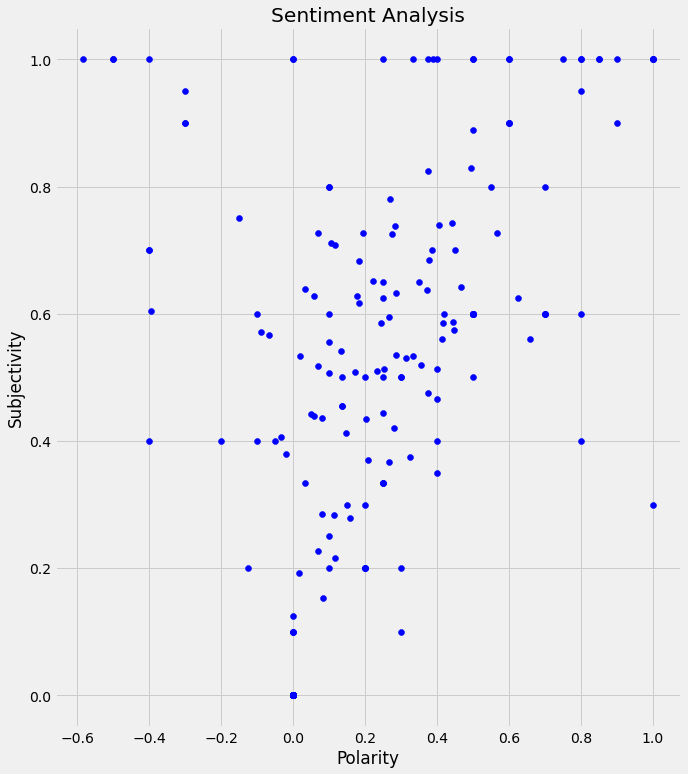

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(10,12))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()  

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['@taylorswift13']

round( (ptweets.shape[0] / df.shape[0]*100), 1)


41.4

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['@taylorswift13']

round((ntweets.shape[0] / df.shape[0]*100), 1)

6.3

In [ ]:
df

,elonmusk,Subjectivity,Polarity,Analysis
0,It s a bit slow,0.4000,-0.300,Negative
1,It s not ready yet,0.5000,-0.100,Negative
2,Explains,0.0000,0.000,Neutral
3,Thanks all Tesla club members for helping out...,0.2000,0.200,Positive
4,Rest in peace Syd Mead Your art will endure,0.0000,0.000,Neutral
...,...,...,...,...
995,Which means a small corner of Texas or anywher...,0.5125,-0.125,Negative
996,1 Gigawatt per square kilometer of solar energ...,0.0000,0.000,Neutral
997,In a few years,0.1000,-0.200,Negative
998,Yeah legs are hydraulic pistons amp abdomen i...,0.0000,0.000,Neutral


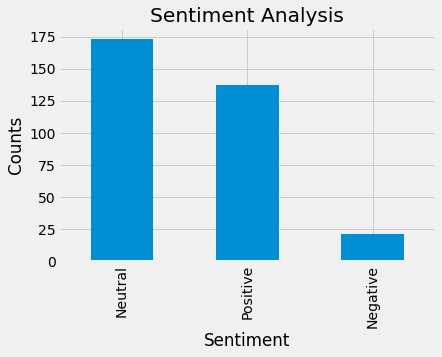

In [ ]:
df['Analysis'].value_counts()


plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.to_csv('taylorswiftsentimentstweets.csv')